<a href="https://colab.research.google.com/github/AhmedAnasHaouari/project_2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # **PROJECT 2 (Part 1)** :

- Haouari Ahmed Anas

- 20/12/2023

# Imports :

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config, preprocessing
set_config(transform_output='pandas')

 - Sources :
  - Dataset: wenruliu. (2016). Adult income dataset. Retrieved from https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

  
  

- Brief description of data :

  - An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc. The detailed description on the dataset can be found in the original UCI documentation
  http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html



- Targets :

  -  Income.


- Rows :

  - 48842 persons.



- Type of problem :

  - Classification.

- Features :

  - 15 features.

# Loading Data :

In [ ]:
file = "/content/drive/MyDrive/datasets/adult.csv"
df = pd.read_csv(file)
df.head()

In [73]:
df1 = df.copy()

In [ ]:
df.shape

- Cleaning data :

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

In [77]:
df.drop_duplicates(inplace = True)

- Exploring data :

In [ ]:
df.describe().round(2)

In [ ]:
df.info()

In [ ]:
df.isin(['?']).sum()

In [ ]:
df.isin([0]).sum()

In [82]:
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)

In [ ]:
for column in df.columns :
  if df[column].dtypes == 'object' :
    n = df[column].nunique()
    print(f'{df[column].value_counts()}\n')
    if n > 9 :
      print(f'There are {n} unique values for {column}. This is a feature with a high cardinality.\n')

In [ ]:
df['educational-num'].value_counts()

- Value counts of the educational_num are the same then those of education. They represente the same variable and one of them can be dropped.

In [85]:
df.drop(columns = 'educational-num', inplace = True)

- Native-country is a feature with a high cardinality. It could be better to drop it.

In [86]:
df.drop(columns = 'native-country', inplace = True)

- Both capital-gain and capital-loss columns have almost 90% data as 0. We can drop them.   

In [87]:
df.drop(columns = ['capital-gain', 'capital-loss'], inplace = True)

In [ ]:
df.shape

In [89]:
df.dropna(how='any',inplace=True)

# Data visualization :

In [90]:
encoder = preprocessing.LabelEncoder()

In [91]:
for i in df.columns :
  if df[i].dtypes == 'object' :
    df[i] = encoder.fit_transform(df[i])

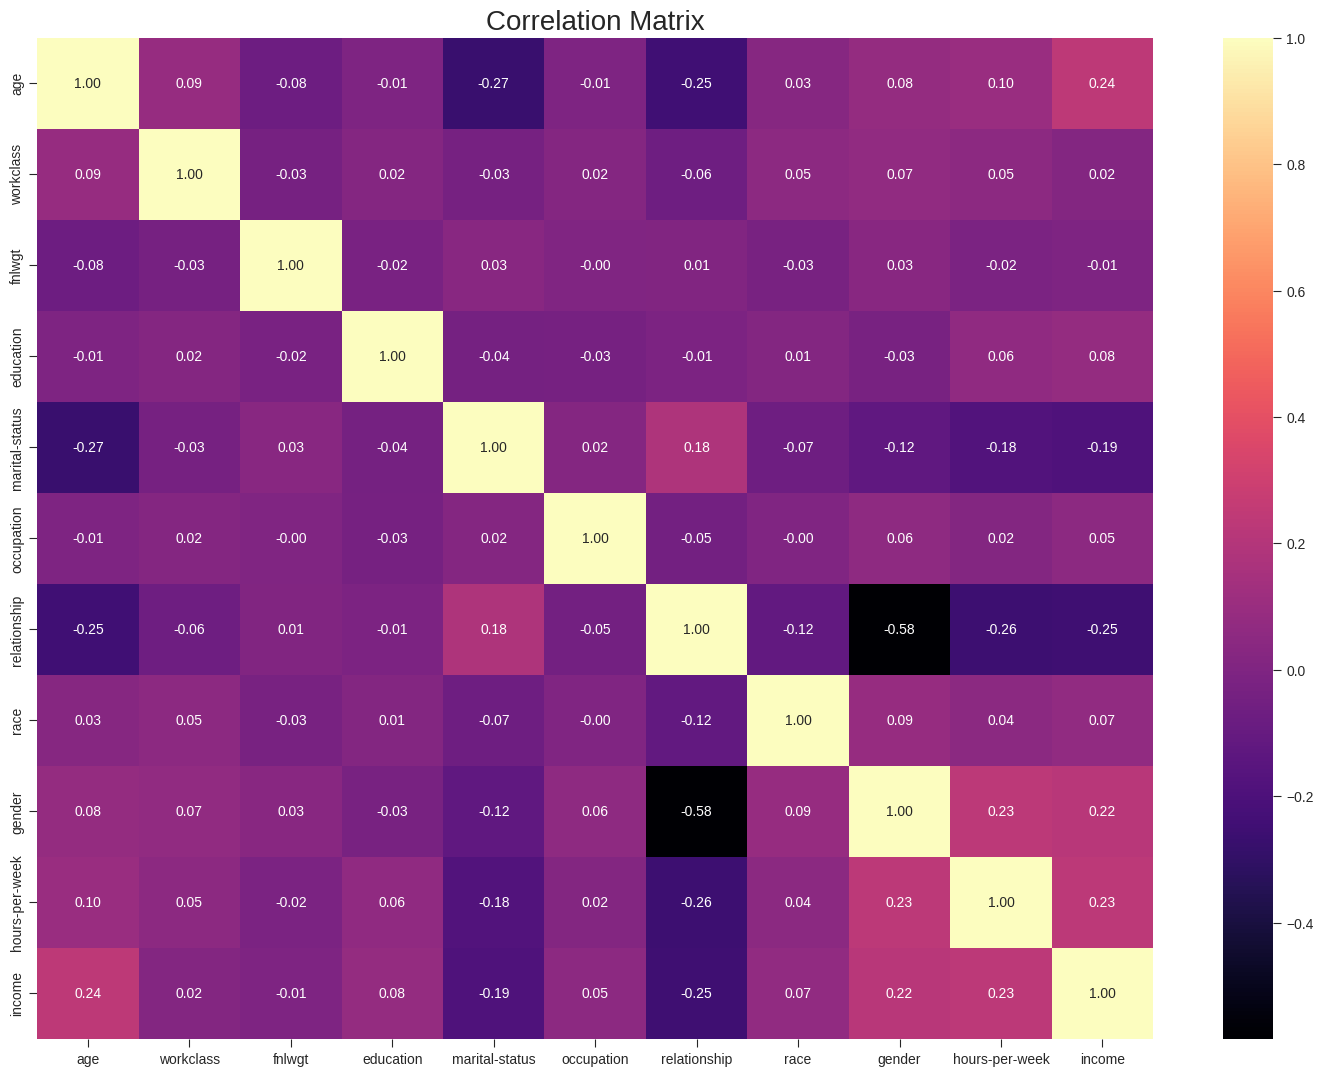

In [126]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
sns.countplot(data=df1, x='gender', hue='income')

- Men have a higher likelihood of earning an income greater than or equal to $50,000 compared to women

In [96]:
df1['hours-per-week_bin'] = pd.cut(df1['hours-per-week'], bins=10)

<ipython-input-111-84321b1787e0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-111-84321b1787e0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hours-per-week']);
<ipython-input-111-84321b1787e0>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level fun

(20.0, 60.0)

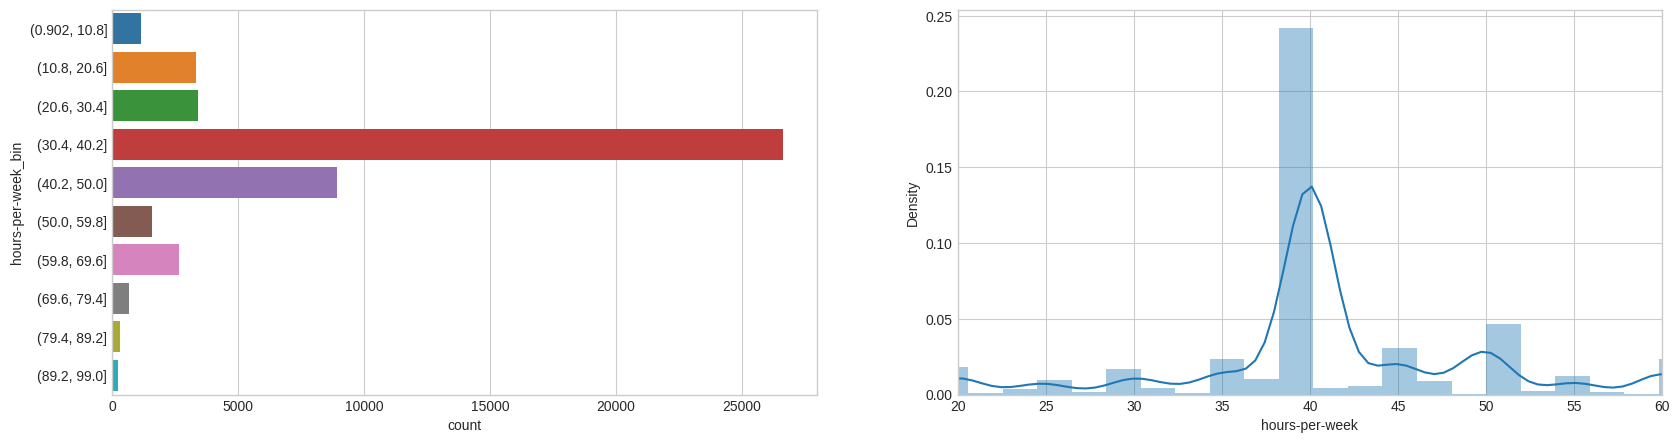

In [111]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=df1);
plt.subplot(1, 2, 2)
sns.distplot(df['hours-per-week']);
sns.distplot(df[df['income'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(df[df['income'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

- A clear correlation exists between an individual's hours of work per week and their income category, with a highest income for those how work  between 30 and 40 hours a week.

In [106]:
df1['age_bin'] = pd.cut(df1['age'], 20)

In [ ]:
plt.style.use('seaborn-ticks')
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(y="age_bin", data=df1, ax=axes[0])
axes[0].set_title('Count of Age Bins')
axes[0].set_ylabel('Age Bins')
axes[0].set_xlabel('Count')

for income_category, color in zip(['>50K', '<=50K'], ['C1', 'C0']):
    sns.histplot(df1[df1['income'] == income_category]['age'], kde=True, label=income_category, color=color, ax=axes[1])
    mean_age = df1[df1['income'] == income_category]['age'].mean()
    axes[1].axvline(mean_age, color=color, linestyle='--', label=f'Mean Age {income_category}: {mean_age:.2f}', linewidth=1)

axes[1].set_title('Distribution of Age by Income with Mean Age')
axes[1].set_xlabel('Age')
axes[1].legend(title='Income')

plt.tight_layout()
plt.show()

- Certain age categories show a significant skew in income distribution, with some age groups having a highest representation in high income categorie.